# Grading Jury Theorem

 

Michael Morreau (2020). [Democracy without Enlightenment: A Jury Theorem for Evaluative Voting](https://onlinelibrary.wiley.com/doi/full/10.1111/jopp.12226), The Journal of Political Philosophy, 2020, pp. 1 - 23


In [1]:
import random
import pylab
import matplotlib.mlab as mlab
import functools
import itertools
from __future__ import print_function
import math
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
import math
from functools import reduce
from collections import Counter
from tqdm.notebook import tqdm  

from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
from IPython.display import display
from IPython.display import display, Math, Latex
sns.set()

```{warning}
This notebook uses Jupyter widgets that will only work if the notebook is run locally. 
```

Suppose that $V=\{1, 2, 3, \ldots, n\}$ is a set of voters or experts, and consider a  set of two alternatives.  E.g., $\{\mbox{convict}, \mbox{acquit}\}$, $\{\mbox{abolish}, \mbox{keep}\}$, $\{0,1\}$, $\ldots$

Let  $\mathbf{x}$ be a random variable (called the **state**)  whose values range over the two alternatives. 

In addition, let $\mathbf{v}_1, \mathbf{v}_2, \ldots$ be random variables represeting the votes for individuals $1, 2, \ldots, n$

Let $R_i$ be the event that $i$ votes correctly: it is  the event that $v_i$ coincides with the state. 

**Unconditional independence (UI)**: The correctness events $R_1, R_2, \ldots, R_n$ are (unconditionally) independent.

**Unconditional competence (UC)**: The (unconditional) correctness probability
$p = Pr(R_i)$, the (unconditional) competence, (i) exceeds $\frac{1}{2}$ and (ii) is the same for
each voter $i$.

**Condorcet Jury Theorem**. Assume UI and UC. As the group size increases, the probability of a
correct majority (i) increases (growing reliability), and (ii) tends to one (infallibility).

The Condorcet Jury Theorem has two main theses: 
    
**The growing-reliability thesis**: Larger groups are better truth-trackers. That
is, they are more likely to select the correct alternative (by majority) than
smaller groups or single individuals.

**The infallibility thesis**: Huge groups are infallible truth-trackers. That is, the
likelihood of a correct (majority) decision tends to full certainty as the group
becomes larger and larger.

In [2]:

class Agent():
    
    def __init__(self, comp=0.501):
        self.comp = comp
        
    def vote(self, ev):
        #vote on whether the event is true or false
        #need the actual truth value in order to know which direction to be biased
        if ev:
            #ev is true
            return int(random.random() < self.comp)
        else:
            return 1 - int(random.random() < self.comp)


def maj_vote(the_votes):
    votes_true = len([v for v in the_votes if v == 1])
    votes_false = len([v for v in the_votes if v == 0])

    if votes_true > votes_false:
        return 1
    elif votes_false > votes_true:
        return 0
    else:
        return -1  #tied

def generate_competences(n, mu=0.51, sigma=0.2):
    competences = list()
    for i in range(0,n):
        #sample a comp until you find one between 1 and 0
        comp=np.random.normal(mu, sigma)
    
        while comp > 1.0 or comp < 0.0:
            comp=np.random.normal(mu, sigma)
        competences.append(comp)
    return competences

In [3]:
import pandas as pd
NUM_ROUNDS = 500
from tqdm import notebook 

def make_plots(max_voters=201, 
               comp_mu=0.501, 
               comp_sigma=0.1):
    P=True
    max_num_voters = max_voters
    total_num_voters = range(1,max_num_voters)

    competences = generate_competences(max_num_voters,
                                       mu=comp_mu, 
                                       sigma=comp_sigma)
    maj_probs = list()
    expert_probs = list()
    for num_voters in notebook.tqdm(total_num_voters, desc='voting'):
        experts = list()

        experts = [Agent(comp=competences[num-1]) for num in range(0,num_voters)]
    
        maj_votes = list()
        expert_votes = list()
        for r in range(0,NUM_ROUNDS):
            # everyone votes
            votes = [a.vote(P) for a in experts]
            maj_votes.append(maj_vote(votes))
        
            expert_votes.append(random.choice(experts).vote(P))
    
        maj_probs.append(float(float(len([v for v in maj_votes if v==1]))/float(len(maj_votes))))
        expert_probs.append(float(len([v for v in expert_votes if v==1]))/float(len(expert_votes)))
    
    sns.set(rc={'figure.figsize':(11,5)})
    plt.subplot(121)

    data = {" ": range(0,max_num_voters), "competence": competences}
    plt.ylim(0,1.05)
    plt.title("Competences")
    df = pd.DataFrame(data=data)
    sns.regplot(x=" ", y="competence", data=df, color=sns.xkcd_rgb["pale red"])


    plt.subplot(122)
    plt.title("Majority vs. Experts")
    plt.plot(list(total_num_voters), maj_probs, label="majority ")
    plt.plot(list(total_num_voters), expert_probs, label="expert ")
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    plt.xlabel('Number of experts')
    plt.ylabel('Probability')
    plt.ylim(0,1.05)
    plt.subplots_adjust(bottom=0.1, right=1.5, top=0.9, wspace = 0.75)

    sns.set()
    plt.savefig("cjt_simulation.png")




In [4]:
p = interact_manual(make_plots,max_voters=(1,501,1),comp_mu=(0,1,0.01),comp_sigma=(0,2,0.1))

interactive(children=(IntSlider(value=201, description='max_voters', max=501, min=1), FloatSlider(value=0.501,…

## Grading Jury Theorem



In [5]:

grades = [0.0, 1.0, 2.0, 3.0, 4.0, 5.0]

correct_grade = 3

class Grader():
    
    def __init__(self, grades, comp=(0.45, 0.15, 0.40)):
        too_low, correct, too_high = comp
        self.grades = grades
        self.comp_too_low = too_low
        self.comp_correct = correct
        self.comp_too_high = too_high
        
    def grade(self, true_grade):

        grades = {
            "L": [g for g in self.grades if g < true_grade],
            "C": [g for g in self.grades if g == true_grade],
            "H": [g for g in self.grades if g > true_grade]
        }
        
        if len(grades["L"]) == 0: 
            grades["L"] = grades["C"]
        elif len(grades["H"]) == 0:
            grades["H"] = grades["C"]

        g_type = random.choices(["L", "C", "H"], 
                                weights=(self.comp_too_low, self.comp_correct, self.comp_too_high))[0]

        return random.choice(grades[g_type])

def median_grade(the_grades): 
    
    return np.median(the_grades)
    
def mean_grade(the_grades): 
    
    return np.mean(the_grades)

def maj_vote(the_votes):
    votes_true = len([v for v in the_votes if v == 1])
    votes_false = len([v for v in the_votes if v == 0])

    if votes_true > votes_false:
        return 1
    elif votes_false > votes_true:
        return 0
    else:
        return -1  #tied



voting:   0%|          | 0/50 [00:00<?, ?it/s]

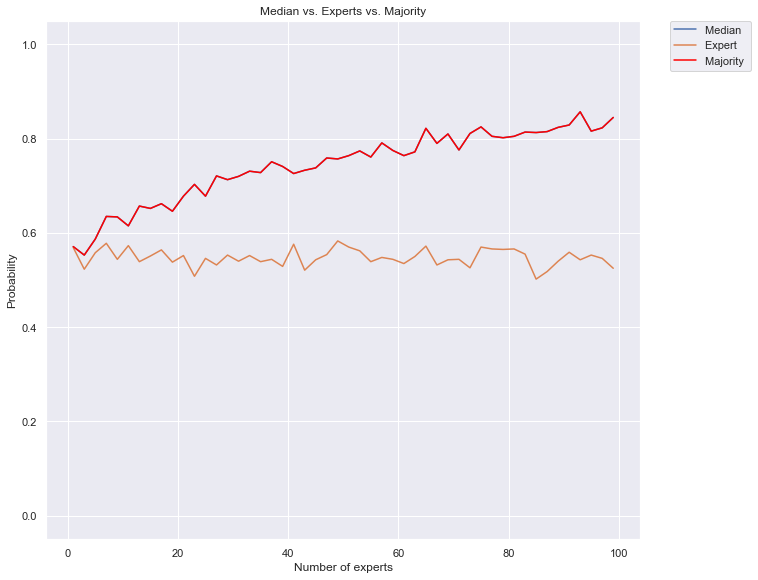

In [6]:
grades = [0.0, 1.0, 2.0, 3.0, 4.0, 5.0]

correct_grade = 5.0

comp_too_low = 0.45
comp_correct = 0.15
comp_too_high = 0.4 

# comp_too_low = 0.3
# comp_correct = 0.55
# comp_too_high = 0.15 

# comp_too_low = 0.3
# comp_correct = 0.1
# comp_too_high = 0.6 

num_rounds = 1000

max_num_voters = 100


median_probs = list()
expert_probs = list()
majority_probs = list()
    
sns.set(rc={'figure.figsize':(6,9)})

for num_voters in notebook.tqdm(range(1,max_num_voters,2), desc='voting'):
    #print(num_voters)
    
    graders = [Grader(grades, comp = (comp_too_low, comp_correct, comp_too_high)) for _ in range(num_voters)]
    
    median_grades = list()
    expert_grades = list()
    majority_votes = list()
    for r in range(num_rounds): 
        
        the_grades = [g.grade(correct_grade) for g in graders]
        the_votes = [g == correct_grade for g in the_grades]
        median_grades.append(median_grade(the_grades))
        
        majority_votes.append(maj_vote(the_votes))
        expert_grades.append(random.choice(graders).grade(correct_grade))
        
    #print(median_grades)
    median_probs.append(float(len([g for g in median_grades if g == correct_grade])) / float(len(median_grades)))
    expert_probs.append(float(len([g for g in expert_grades if g == correct_grade])) / float(len(expert_grades)))
    majority_probs.append(float(len([g for g in majority_votes if g == 1])) / float(len(majority_votes)))
    

plt.title("Median vs. Experts vs. Majority")
plt.plot(list(range(1,max_num_voters,2)), median_probs, label="Median ")
plt.plot(list(range(1,max_num_voters,2)), expert_probs, label="Expert ")
plt.plot(list(range(1,max_num_voters,2)), majority_probs, color="red", label="Majority ")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlabel('Number of experts')
plt.ylabel('Probability')
plt.ylim(-0.05,1.05)
plt.subplots_adjust(bottom=0.1, right=1.5, top=0.9, wspace = 0.75)

    
    


voting:   0%|          | 0/50 [00:00<?, ?it/s]

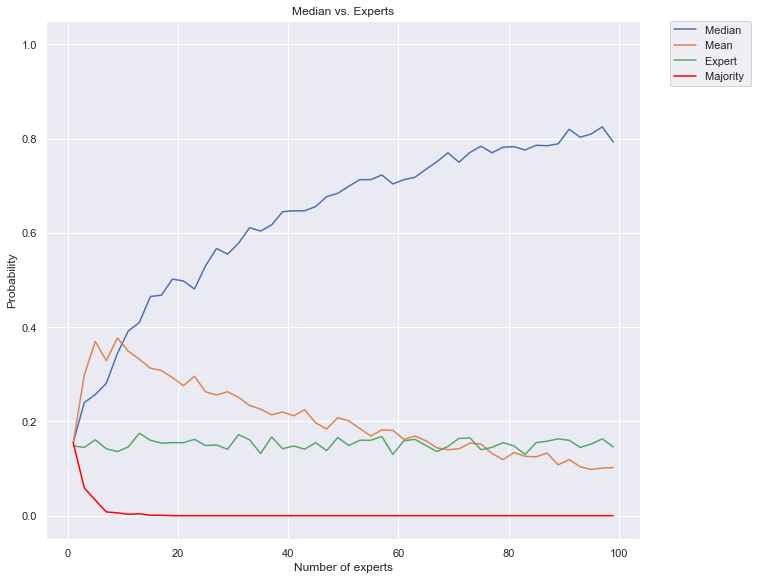

In [7]:
grades = [0.0, 1.0, 2.0, 3.0, 4.0, 5.0]

correct_grade = 4.0

comp_too_low = 0.45
comp_correct = 0.15
comp_too_high = 0.4 

# comp_too_low = 0.3
# comp_correct = 0.5
# comp_too_high = 0.2 

# comp_too_low = 0.3
# comp_correct = 0.1
# comp_too_high = 0.6 

num_rounds = 1000

max_num_voters = 100


median_probs = list()
expert_probs = list()
mean_probs = list()
majority_probs = list()
    
sns.set(rc={'figure.figsize':(6,9)})

for num_voters in notebook.tqdm(range(1,max_num_voters,2), desc='voting'):
    #print(num_voters)
    
    graders = [Grader(grades, comp = (comp_too_low, comp_correct, comp_too_high)) for _ in range(num_voters)]
    
    median_grades = list()
    mean_grades = list()
    expert_grades = list()
    majority_votes = list()
    for r in range(num_rounds): 
        
        the_grades = [g.grade(correct_grade) for g in graders]
        the_votes = [g == correct_grade for g in the_grades]
        median_grades.append(median_grade(the_grades))
        mean_grades.append(mean_grade(the_grades))
        
        majority_votes.append(maj_vote(the_votes))
        expert_grades.append(random.choice(graders).grade(correct_grade))
        
    #print(median_grades)
    median_probs.append(float(len([g for g in median_grades if g == correct_grade])) / float(len(median_grades)))
    mean_probs.append(float(len([g for g in mean_grades if round(g, 0) == correct_grade])) / float(len(mean_grades)))
    expert_probs.append(float(len([g for g in expert_grades if g == correct_grade])) / float(len(expert_grades)))
    majority_probs.append(float(len([g for g in majority_votes if g == 1])) / float(len(majority_votes)))
    

plt.title("Median vs. Experts")
plt.plot(list(range(1,max_num_voters,2)), median_probs, label="Median ")
plt.plot(list(range(1,max_num_voters,2)), mean_probs, label="Mean ")
plt.plot(list(range(1,max_num_voters,2)), expert_probs, label="Expert ")
plt.plot(list(range(1,max_num_voters,2)), majority_probs, color="red", label="Majority ")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlabel('Number of experts')
plt.ylabel('Probability')
plt.ylim(-0.05,1.05)
plt.subplots_adjust(bottom=0.1, right=1.5, top=0.9, wspace = 0.75)

    
    


In [8]:
def generate_competences(num_experts, mu = 0.15, sigma = 0.1, min_bias = 0.25, max_bias = 0.75):
    
    # sample competence
    competences = list()
    
    for i in range(0,num_experts):
        #sample a comp until you find one between 1 and 0
        comp=np.random.normal(mu, sigma)
    
        while comp > 1.0 or comp < 0.0:
            comp=np.random.normal(mu, sigma)
        
        wrong = 1 - comp
        
        bias = np.random.uniform(min_bias, max_bias)
        too_low = wrong * bias
        
        too_high = wrong * (1 - bias)
        competences.append((too_low, comp, too_high))
        
        
    return competences
        

In [9]:
num_rounds = 1000

max_num_voters = 100


def make_plots_grader2(max_num_voters=100, 
                       correct_grade = 3.0,
                       mean=0.15,
                       std=0.1,
                       min_bias = 0.25,
                       max_bias = 0.75):


    median_probs = list()
    mean_probs = list()
    expert_probs = list()
    majority_probs = list()


    competences = generate_competences(max_num_voters, 
                                       mu = mean, 
                                       sigma = std, 
                                       min_bias = min_bias, 
                                       max_bias = max_bias)
    #print(competences)
    for num_voters in notebook.tqdm(range(1, max_num_voters, 2), desc='voting'):
        #print(num_voters)

        graders = [Grader(grades, comp = competences[_]) for _ in range(num_voters)]

        median_grades = list()
        mean_grades = list()
        expert_grades = list()
        majority_votes = list()
        for r in range(num_rounds): 

            the_grades = [g.grade(correct_grade) for g in graders]
            the_votes = [g == correct_grade for g in the_grades]
            median_grades.append(median_grade(the_grades))
            mean_grades.append(mean_grade(the_grades))

            majority_votes.append(maj_vote(the_votes))
            expert_grades.append(random.choice(graders).grade(correct_grade))

        #print(median_grades)
        median_probs.append(float(len([g for g in median_grades if g == correct_grade])) / float(len(median_grades)))
        mean_probs.append(float(len([g for g in mean_grades if round(g, 0) == correct_grade])) / float(len(mean_grades)))
        expert_probs.append(float(len([g for g in expert_grades if g == correct_grade])) / float(len(expert_grades)))
        majority_probs.append(float(len([g for g in majority_votes if g == 1])) / float(len(majority_votes)))

    fig, axs = plt.subplots(ncols=2, figsize=(14, 7), sharex=True, sharey=False)

    data = {"Voter": range(0,max_num_voters),  "too_low": [c[0] for c in competences], "correct": [c[1] for c in competences], "too_high": [c[2] for c in competences]}
    axs[0].set_ylim(0,1.05)
    axs[0].set_title("Competences")
    df = pd.DataFrame(data=data)
    sns.regplot(x="Voter", y="correct", data=df, color=sns.xkcd_rgb["pale red"], label="Correct", ax = axs[0])
    sns.regplot(x="Voter", y="too_low", data=df, color=sns.xkcd_rgb["blue"], label="Too Low", ax = axs[0])
    sns.regplot(x="Voter", y="too_high", data=df, color=sns.xkcd_rgb["green"], label="Too High", ax = axs[0])
    axs[0].set_ylabel(" ")
    axs[0].legend(loc="upper center",ncol=3)


    axs[1].set_title("Median vs. Experts")
    axs[1].plot(list(range(1,max_num_voters,2)), median_probs, label="Median ")
    axs[1].plot(list(range(1,max_num_voters,2)), mean_probs, label="Mean ")
    axs[1].plot(list(range(1,max_num_voters,2)), expert_probs, label="Expert ")
    axs[1].plot(list(range(1,max_num_voters,2)), majority_probs, color="red", label="Majority ")
    axs[1].legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    axs[1].set_xlabel('Number of experts')
    axs[1].set_ylabel('Probability')
    axs[1].set_ylim(-0.05,1.05)
    #plt.subplots_adjust(bottom=0.1, right=1.5, top=0.9, wspace = 0.75)
    plt.show()
    
    


In [10]:
p = interact_manual(make_plots_grader2,
                    max_num_voters=(1,200,1),
                    correct_grade = (0.0,5.0,1),
                    mean=(0,1,0.01),
                    std=(0,2,0.1),
                    min_bias = (0.0,1.0,0.1),
                    max_bias = (0.0, 1.0, 0.1))

interactive(children=(IntSlider(value=100, description='max_num_voters', max=200, min=1), FloatSlider(value=3.…

In [11]:
def generate_competences2(num_experts, params = (1, 1, 1)):
    
    return [tuple(np.random.dirichlet(params)) for _ in range(num_experts)]


In [12]:
num_rounds = 1000

max_num_voters = 100


def make_plots_grader3(max_num_voters=100,
                       correct_grade = 3.0,
                       too_low=1,
                       correct=1,
                       too_high = 1):


    median_probs = list()
    mean_probs = list()
    expert_probs = list()
    majority_probs = list()


    competences = generate_competences2(max_num_voters,
                                        params = (too_low, correct, too_high))
    #print(competences)
    for num_voters in notebook.tqdm(range(1, max_num_voters, 2), desc='voting'):
        #print(num_voters)

        graders = [Grader(grades, comp = competences[_]) for _ in range(num_voters)]

        median_grades = list()
        mean_grades = list()
        expert_grades = list()
        majority_votes = list()
        for r in range(num_rounds): 

            the_grades = [g.grade(correct_grade) for g in graders]
            the_votes = [g == correct_grade for g in the_grades]
            median_grades.append(median_grade(the_grades))
            mean_grades.append(mean_grade(the_grades))

            majority_votes.append(maj_vote(the_votes))
            expert_grades.append(random.choice(graders).grade(correct_grade))

        #print(median_grades)
        median_probs.append(float(len([g for g in median_grades if g == correct_grade])) / float(len(median_grades)))
        mean_probs.append(float(len([g for g in mean_grades if round(g, 0) == correct_grade])) / float(len(mean_grades)))
        expert_probs.append(float(len([g for g in expert_grades if g == correct_grade])) / float(len(expert_grades)))
        majority_probs.append(float(len([g for g in majority_votes if g == 1])) / float(len(majority_votes)))

    fig, axs = plt.subplots(ncols=2, figsize=(14, 7), sharex=True, sharey=False)

    data = {"Voter": range(0,max_num_voters),  "too_low": [c[0] for c in competences], "correct": [c[1] for c in competences], "too_high": [c[2] for c in competences]}
    axs[0].set_ylim(0,1.05)
    axs[0].set_title("Competences")
    df = pd.DataFrame(data=data)
    sns.regplot(x="Voter", y="correct", data=df, color=sns.xkcd_rgb["pale red"], label="Correct", ax = axs[0])
    sns.regplot(x="Voter", y="too_low", data=df, color=sns.xkcd_rgb["blue"], label="Too Low", ax = axs[0])
    sns.regplot(x="Voter", y="too_high", data=df, color=sns.xkcd_rgb["green"], label="Too High", ax = axs[0])
    axs[0].set_ylabel(" ")
    axs[0].legend(loc="upper center",ncol=3)


    axs[1].set_title("Median vs. Experts")
    axs[1].plot(list(range(1,max_num_voters,2)), median_probs, label="Median ")
    axs[1].plot(list(range(1,max_num_voters,2)), mean_probs, label="Mean ")
    axs[1].plot(list(range(1,max_num_voters,2)), expert_probs, label="Expert ")
    axs[1].plot(list(range(1,max_num_voters,2)), majority_probs, color="red", label="Majority ")
    axs[1].legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    axs[1].set_xlabel('Number of experts')
    axs[1].set_ylabel('Probability')
    axs[1].set_ylim(-0.05,1.05)
    #plt.subplots_adjust(bottom=0.1, right=1.5, top=0.9, wspace = 0.75)
    plt.show()
    
    


In [13]:
p = interact_manual(make_plots_grader3,
                    max_num_voters=(1,200,1),
                    correct_grade = (0.0,5.0,1),
                    too_low=(1,10),
                    correct=(1,10),
                    too_high=(1,10))

interactive(children=(IntSlider(value=100, description='max_num_voters', max=200, min=1), FloatSlider(value=3.…